# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("/datasets/real_estate_data.csv", sep ="\t")

In [3]:
display(df.head(10))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

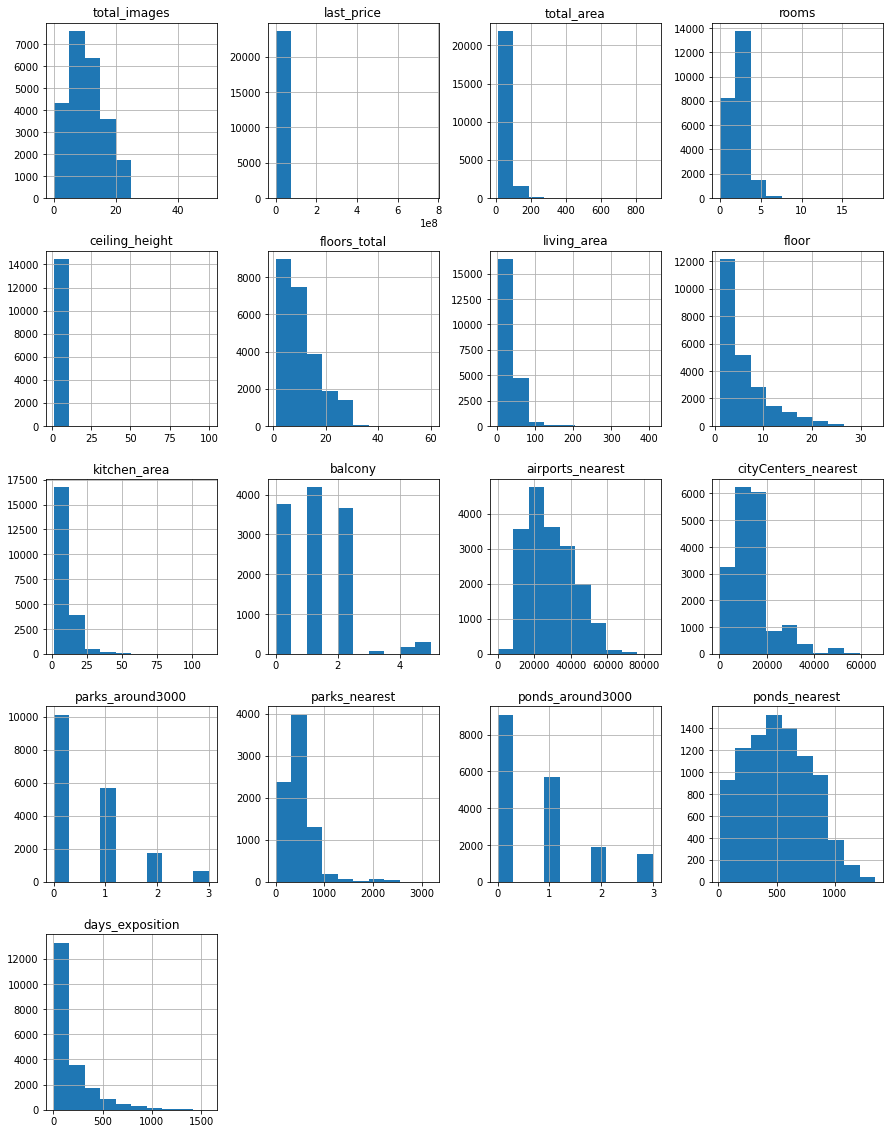

In [5]:
df.hist(figsize=(15,20))

Комментарий: есть большое количество пропуском и неверный формат столбцов.

### Предобработка данных

In [6]:
print(df.isna().sum())

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64


In [7]:
print(df.duplicated().sum())

0


# ceiling height

<AxesSubplot:>

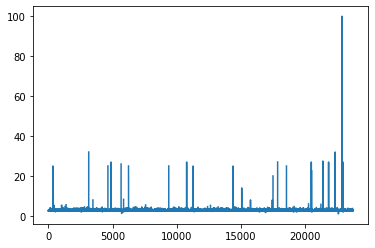

In [8]:
df["ceiling_height"].plot()

Вывод:

In [9]:
df.loc[(df["ceiling_height"] > 5) | (df["ceiling_height"] < 2.5),"ceiling_height"] = pd.NA #выбивающиеся результаты -> нан 
df["ceiling_height"] = df["ceiling_height"].fillna(df["ceiling_height"].median()) #нан -> мадиана


<AxesSubplot:>

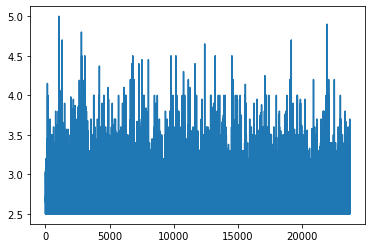

In [10]:
df["ceiling_height"].plot()

# floors total; living area; kitchen area

Пропуски данных сталбцов было принято заполнить из медианными значениями. В связи с тем, что данные по этим группам имеют много низких и много больших значений, которые бы испортили среднее значение. 

In [11]:
df["floors_total"] = df["floors_total"].fillna(df["floors_total"].median()) #нан -> мадиана

In [12]:
df["living_area"] = df["living_area"].fillna(df["living_area"].median()) #нан -> мадиана

In [13]:
df["kitchen_area"] = df["kitchen_area"].fillna(df["kitchen_area"].median()) #нан -> мадиана

# is apartment

In [14]:
print(df["is_apartment"].unique()) # проверка на другие значения

[nan False True]


In [15]:
df["kitchen_area"] = df["kitchen_area"].fillna(False) #нан -> False

# balcony

In [16]:
print(df["balcony"].unique()) # проверка на другие значения

[nan  2.  0.  1.  5.  4.  3.]


In [17]:
df["balcony"] = df["balcony"].fillna(0.0) #нан -> 0

In [18]:
df["balcony"] = df["balcony"].astype(int) #float -> int

# locality type

In [19]:
display(df[df["locality_name"].isna()].head(10))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1097,3,8600000.0,81.7,2016-04-15T00:00:00,3,3.55,5.0,50.80,2,NaN,...,8.80,0,NaN,23478.0,4258.0,0.0,NaN,0.0,NaN,147.0
2033,6,5398000.0,80.0,2017-05-30T00:00:00,3,2.65,4.0,42.60,2,NaN,...,18.60,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.0
2603,20,3351765.0,42.7,2015-09-20T00:00:00,1,2.65,24.0,15.60,3,NaN,...,10.70,0,NaN,22041.0,17369.0,0.0,NaN,1.0,374.0,276.0
2632,2,5130593.0,62.4,2015-10-11T00:00:00,2,2.65,24.0,33.10,21,NaN,...,8.20,0,NaN,22041.0,17369.0,0.0,NaN,1.0,374.0,256.0
3574,10,4200000.0,46.5,2016-05-28T00:00:00,2,2.65,5.0,30.80,5,NaN,...,6.50,0,NaN,27419.0,8127.0,0.0,NaN,1.0,603.0,45.0
4151,17,17600000.0,89.5,2014-12-09T00:00:00,2,3.00,8.0,39.62,7,NaN,...,13.38,0,NaN,25054.0,3902.0,1.0,485.0,3.0,722.0,869.0
4189,7,9200000.0,80.0,2015-12-10T00:00:00,3,4.00,4.0,52.30,3,False,...,10.40,0,NaN,21774.0,3039.0,1.0,690.0,1.0,953.0,223.0
4670,1,5500000.0,83.0,2015-08-14T00:00:00,3,2.65,7.0,30.00,6,NaN,...,9.10,0,NaN,26534.0,5382.0,1.0,446.0,1.0,376.0,350.0
5343,19,13540000.0,85.5,2016-01-20T00:00:00,3,2.65,7.0,59.10,5,False,...,8.30,4,NaN,10556.0,9538.0,1.0,67.0,0.0,NaN,303.0
5707,7,3700000.0,30.0,2016-04-29T00:00:00,1,2.65,24.0,20.00,23,NaN,...,9.10,0,NaN,21460.0,16788.0,0.0,NaN,1.0,170.0,49.0


In [20]:
df["locality_name"] = df["locality_name"].fillna("unknown") #нан -> "unknown"

In [21]:
print(df["locality_name"].unique())

['Санкт-Петербург' 'посёлок Шушары' 'городской посёлок Янино-1'
 'посёлок Парголово' 'посёлок Мурино' 'Ломоносов' 'Сертолово' 'Петергоф'
 'Пушкин' 'деревня Кудрово' 'Коммунар' 'Колпино'
 'поселок городского типа Красный Бор' 'Гатчина' 'поселок Мурино'
 'деревня Фёдоровское' 'Выборг' 'Кронштадт' 'Кировск'
 'деревня Новое Девяткино' 'посёлок Металлострой'
 'посёлок городского типа Лебяжье' 'посёлок городского типа Сиверский'
 'поселок Молодцово' 'поселок городского типа Кузьмоловский'
 'садовое товарищество Новая Ропша' 'Павловск' 'деревня Пикколово'
 'Всеволожск' 'Волхов' 'Кингисепп' 'Приозерск' 'Сестрорецк'
 'деревня Куттузи' 'посёлок Аннино' 'поселок городского типа Ефимовский'
 'посёлок Плодовое' 'деревня Заклинье' 'поселок Торковичи'
 'поселок Первомайское' 'Красное Село' 'посёлок Понтонный' 'Сясьстрой'
 'деревня Старая' 'деревня Лесколово' 'посёлок Новый Свет' 'Сланцы'
 'село Путилово' 'Ивангород' 'Мурино' 'Шлиссельбург' 'Никольское'
 'Зеленогорск' 'Сосновый Бор' 'поселок Новый Све

In [22]:
df["locality_name"] = df["locality_name"].str.lower()

In [23]:
df['locality_name'] = df['locality_name'].str.replace('поселок городского типа', 'поселок', regex=True)
df['locality_name'] = df['locality_name'].str.replace('поселок при железнодорожной станции', 'поселок', regex=True)
df['locality_name'] = df['locality_name'].str.replace('поселок станции', 'поселок', regex=True)
df['locality_name'] = df['locality_name'].str.replace('городской поселок', 'поселок', regex=True)
#замена разных названий одного и того же поселка

In [24]:
def locality_type(name):
    if "село" in name:
        return "село"
    elif "дерев" in name:
        return "деревня"
    elif "посёл" in name:
        return "поселок"
    elif "посел" in name:
        return "поселок"
    else:
        return "город"


In [25]:
df["locality_type"] = df["locality_name"].apply(locality_type) #создание столбца с типом места

In [26]:
display(df.head(10)) #проверяем

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_type
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,0,санкт-петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,город
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,2.65,11.0,18.60,1,NaN,...,2,посёлок шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,поселок
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,2.65,5.0,34.30,4,NaN,...,0,санкт-петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,город
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,2.65,14.0,30.00,9,NaN,...,0,санкт-петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,город
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,0,санкт-петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,город
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,2.65,12.0,14.40,5,NaN,...,0,городской посёлок янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0,поселок
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,2.65,26.0,10.60,6,NaN,...,1,посёлок парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0,поселок
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,2.65,24.0,30.00,22,NaN,...,2,санкт-петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN,город
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,2.65,27.0,15.43,26,NaN,...,0,посёлок мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0,поселок
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,2,санкт-петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0,город


# airports nearest 

Схоже ранией ситуацией, лучшим решением для данных пропусков, будет их заполнение медианными значениями, но по группам. По группам типа места. Так как неверно будет заполнять дистанцию до аэропорта квартирам в городе использую данные по поселкам. Так как принято строить аэропорты за городом, где как раз находятся поселки. 

In [27]:
median_airports = df.groupby("locality_type")["airports_nearest"].median() 

In [28]:
df.loc[df["locality_type"] == "город","airports_nearest"] = df["airports_nearest"].fillna(median_airports["город"])
df.loc[df["locality_type"] == "деревня","airports_nearest"] = df["airports_nearest"].fillna(median_airports["деревня"])
df.loc[df["locality_type"] == "поселок","airports_nearest"] = df["airports_nearest"].fillna(median_airports["поселок"])
#нан -> 0 (по группе)

# city centers nearest

In [29]:
median_centers = df.groupby("locality_type")["cityCenters_nearest"].median()

In [30]:
df.loc[df["locality_type"] == "город","cityCenters_nearest"] = df["cityCenters_nearest"].fillna(median_centers["город"])
df.loc[df["locality_type"] == "деревня","cityCenters_nearest"] = df["cityCenters_nearest"].fillna(median_centers["деревня"])
df.loc[df["locality_type"] == "поселок","cityCenters_nearest"] = df["cityCenters_nearest"].fillna(median_centers["поселок"])
#нан -> 0 (по группе)

# parks around 3000 and ponds around 3000

In [31]:
df["parks_around3000"] = df["parks_around3000"].fillna(0)
df["ponds_around3000"] = df["ponds_around3000"].fillna(0)
#нан -> 0

# result

In [32]:
print(df.isna().sum()) #проверяем успехи с нан

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         1528
cityCenters_nearest      1528
parks_around3000            0
parks_nearest           15620
ponds_around3000            0
ponds_nearest           14589
days_exposition          3181
locality_type               0
dtype: int64


In [33]:
df.info() #проверяем успехи с type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        23699 non-null  float64
 6   floors_total          23699 non-null  float64
 7   living_area           23699 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          23699 non-null  float64
 13  balcony               23699 non-null  int64  
 14  locality_name         23699 non-null  object 
 15  airports_nearest   

In [34]:
print(df.duplicated().sum()) #проверяем не создали ли мы дубликатов

0


Комментарий: по результатом предобработки данных, данные стали подходящими для последующего анализа для вывода. 

# total_area

In [35]:
print(df["total_area"].describe())

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64


Предположим, что все что больше 300 квадратных метров - это ошибка на одну десятичную.

In [36]:
df.loc[df["total_area"] > 300,"total_area"] = (df.loc[df["total_area"] > 300,"total_area"])/10

In [37]:
print(df["total_area"].describe())

count    23699.000000
mean        59.403061
std         30.520928
min         12.000000
25%         40.000000
50%         52.000000
75%         69.300000
max        300.000000
Name: total_area, dtype: float64


# rooms

In [38]:
print(df["rooms"].describe())

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64


Предположим, что все что больше 7 комнат - выброс.

In [39]:
df = df[df["rooms"] < 7]

In [40]:
print(df["rooms"].describe())

count    23609.000000
mean         2.047905
std          1.006772
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          6.000000
Name: rooms, dtype: float64


<AxesSubplot:title={'center':'rooms'}, ylabel='Frequency'>

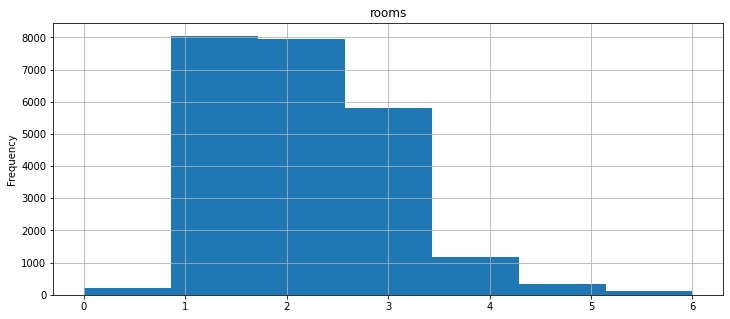

In [41]:
df["rooms"].plot(kind = "hist", bins = 7, title ="rooms", grid = True, figsize = (12,5))

# last_price

In [42]:
print(df["last_price"].describe())

count    2.360900e+04
mean     6.369906e+06
std      8.753600e+06
min      1.219000e+04
25%      3.400000e+06
50%      4.600000e+06
75%      6.735600e+06
max      4.013000e+08
Name: last_price, dtype: float64


<AxesSubplot:title={'center':'last_price'}, ylabel='Frequency'>

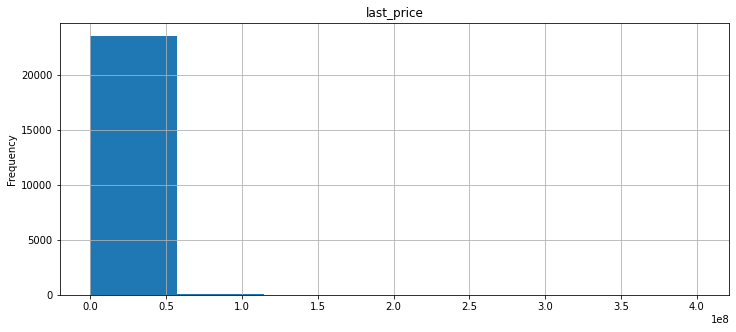

In [43]:
df["last_price"].plot(kind = "hist", bins = 7, title ="last_price", grid = True, figsize = (12,5))

Предположим, что все что больше 100000000 рублей - выброс.

In [44]:
df = df[df["last_price"] < 100000000]

<AxesSubplot:title={'center':'last_price'}, ylabel='Frequency'>

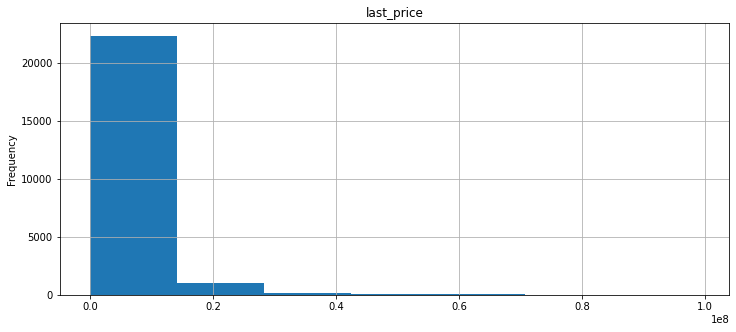

In [45]:
df["last_price"].plot(kind = "hist", bins = 7, title ="last_price", grid = True, figsize = (12,5))

Однако, можно заметить, что минимальная стоимость квартиры, состовляет 12000, что очень мало, даже для камер хранения. посмотрим на топ 10 самых дешевых квартир:

In [46]:
display(df.sort_values(by="last_price").head(10))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_type
8793,7,12190.0,109.0,2019-03-20T00:00:00,2,2.75,25.0,32.0,25,NaN,...,0,санкт-петербург,36421.0,9176.0,1.0,805.0,0.0,NaN,8.0,город
17456,7,430000.0,30.4,2019-04-22T00:00:00,1,2.65,2.0,16.0,1,NaN,...,0,сланцы,26873.5,12702.0,0.0,NaN,0.0,NaN,NaN,город
14911,5,430000.0,54.0,2018-06-26T00:00:00,2,2.65,3.0,30.0,3,NaN,...,0,посёлок станции свирь,25531.0,21246.0,0.0,NaN,0.0,NaN,44.0,поселок
16274,18,440000.0,40.0,2018-07-10T00:00:00,1,2.65,5.0,30.0,1,NaN,...,0,деревня старополье,NaN,NaN,0.0,NaN,0.0,NaN,45.0,деревня
17676,0,450000.0,36.5,2018-02-01T00:00:00,1,2.65,5.0,17.3,4,NaN,...,1,деревня ям-тесово,NaN,NaN,0.0,NaN,0.0,NaN,120.0,деревня
5698,7,450000.0,42.0,2017-07-31T00:00:00,2,2.65,1.0,23.0,1,NaN,...,0,городской посёлок будогощь,25531.0,21246.0,0.0,NaN,0.0,NaN,233.0,поселок
9581,7,450000.0,43.4,2018-08-31T00:00:00,2,2.65,5.0,30.3,3,NaN,...,0,деревня старополье,NaN,NaN,0.0,NaN,0.0,NaN,96.0,деревня
16219,14,450000.0,38.5,2018-07-11T00:00:00,2,2.65,2.0,30.0,1,NaN,...,0,деревня вахнова кара,NaN,NaN,0.0,NaN,0.0,NaN,45.0,деревня
21912,0,470000.0,37.0,2018-02-18T00:00:00,1,2.65,3.0,30.0,3,NaN,...,0,поселок совхозный,NaN,NaN,0.0,NaN,0.0,NaN,45.0,село
23484,11,470000.0,44.5,2018-07-02T00:00:00,2,2.65,2.0,28.0,2,NaN,...,0,сланцы,26873.5,12702.0,0.0,NaN,0.0,NaN,298.0,город


Как видно, это единный случай и видимо, что тот кто заполнял форму ошибся с десятичной. Можно предположить, что это должно быть  12 миллионов, но рискавать не будем, поэтому вырежем данную строку:

In [47]:
df = df[df["last_price"] > 100000]

In [48]:
print(df["last_price"].describe())

count    2.357900e+04
mean     6.170962e+06
std      6.201951e+06
min      4.300000e+05
25%      3.400000e+06
50%      4.600000e+06
75%      6.700000e+06
max      9.900000e+07
Name: last_price, dtype: float64


### Посчитайте и добавьте в таблицу новые столбцы

# price per m^2

In [49]:
df["price_per_meter_sqr"] = df["last_price"]/df["total_area"]

# weekday

In [50]:
df["first_day_exposition"] = pd.to_datetime(df["first_day_exposition"], format = "%Y-%m-%dT%H:%M:%S")

In [51]:
df["appearance_weekday"] = pd.DatetimeIndex(df["first_day_exposition"]).weekday

# month

In [52]:
df["appearance_month"] = pd.DatetimeIndex(df["first_day_exposition"]).month

# year

In [53]:
df["appearance_year"] = pd.DatetimeIndex(df["first_day_exposition"]).year

# floor type

In [54]:
df.loc[(df['floor'] == 1), 'floor_type'] = 'первый'
df.loc[(df['floor'] == df['floors_total']), 'floor_type'] = 'последний'
df.loc[(df['floor'] != df['floors_total']) & (df['floor'] != 1), 'floor_type'] = 'другой'

# distance to center

In [55]:
df["distance_to_center"] = df["cityCenters_nearest"]/1000
df.loc[df["distance_to_center"].notna()] = round(df.loc[df["distance_to_center"].notna()],0)

# result

In [56]:
display(df.head(10)) #проверяем созданные столбцов

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,locality_type,price_per_meter_sqr,appearance_weekday,appearance_month,appearance_year,floor_type,distance_to_center
0,20,13000000.0,108.0,2019-03-07,3,3.0,16.0,51.0,8,NaN,...,2.0,755.0,NaN,город,120370.0,3,3,2019,другой,16.0
1,7,3350000.0,40.0,2018-12-04,1,3.0,11.0,19.0,1,NaN,...,0.0,NaN,81.0,поселок,82921.0,1,12,2018,первый,19.0
2,10,5196000.0,56.0,2015-08-20,2,3.0,5.0,34.0,4,NaN,...,2.0,574.0,558.0,город,92786.0,3,8,2015,другой,14.0
3,0,64900000.0,159.0,2015-07-24,3,3.0,14.0,30.0,9,NaN,...,3.0,234.0,424.0,город,408176.0,4,7,2015,другой,7.0
4,2,10000000.0,100.0,2018-06-19,2,3.0,14.0,32.0,13,NaN,...,1.0,48.0,121.0,город,100000.0,1,6,2018,другой,8.0
5,10,2890000.0,30.0,2018-09-10,1,3.0,12.0,14.0,5,NaN,...,0.0,NaN,55.0,поселок,95066.0,0,9,2018,другой,21.0
6,6,3700000.0,37.0,2017-11-02,1,3.0,26.0,11.0,6,NaN,...,0.0,NaN,155.0,поселок,99196.0,3,11,2017,другой,19.0
7,5,7915000.0,72.0,2019-04-18,2,3.0,24.0,30.0,22,NaN,...,0.0,NaN,NaN,город,110545.0,3,4,2019,другой,12.0
8,20,2900000.0,33.0,2018-05-23,1,3.0,27.0,15.0,26,NaN,...,0.0,NaN,189.0,поселок,87455.0,2,5,2018,другой,21.0
9,18,5400000.0,61.0,2017-02-26,3,2.0,9.0,44.0,7,NaN,...,0.0,NaN,289.0,город,88525.0,6,2,2017,другой,15.0


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23579 entries, 0 to 23698
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23579 non-null  int64         
 1   last_price            23579 non-null  float64       
 2   total_area            23579 non-null  float64       
 3   first_day_exposition  23579 non-null  datetime64[ns]
 4   rooms                 23579 non-null  int64         
 5   ceiling_height        23579 non-null  float64       
 6   floors_total          23579 non-null  float64       
 7   living_area           23579 non-null  float64       
 8   floor                 23579 non-null  int64         
 9   is_apartment          2766 non-null   object        
 10  studio                23579 non-null  bool          
 11  open_plan             23579 non-null  bool          
 12  kitchen_area          23579 non-null  float64       
 13  balcony         

Комментарий: столбцы созданы успешно

### Проведите исследовательский анализ данных

# total_area

<AxesSubplot:title={'center':'total_area'}, ylabel='Frequency'>

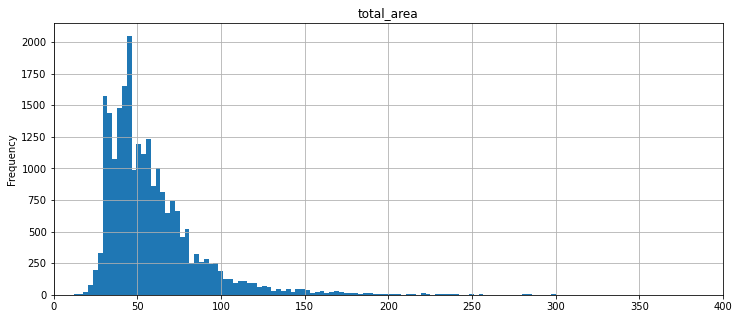

In [58]:
df["total_area"].plot(kind = "hist", bins = 100, title ="total_area", grid = True, figsize = (12,5), xlim = [0,400])

Как видно из графика, большинство квартир имеют общую площадь с районе 30-40 квадратных метром. Далее, при возрастании площади, количество квартир уменьшается экспоненциально. 

# living_area

<AxesSubplot:title={'center':'living_area'}, ylabel='Frequency'>

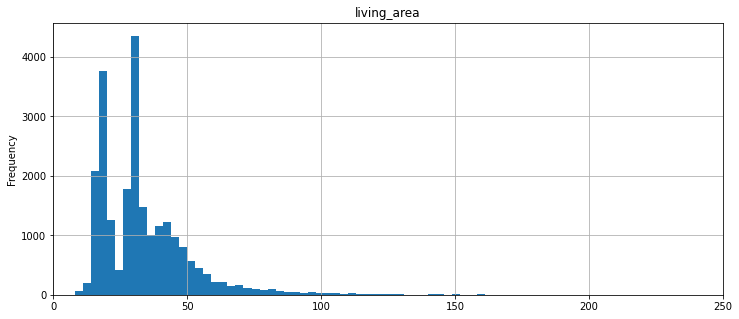

In [59]:
df["living_area"].plot(kind = "hist", bins = 100, title ="living_area", grid = True, figsize = (12,5), xlim = [0,250])

Общая картина графика схожа с графиком общий площади, что логично. Однако, можно заметить сильную впадину на уровне в 25-30 квадратных метров.

# kitchen_area

<AxesSubplot:title={'center':'kitchen_area'}, ylabel='Frequency'>

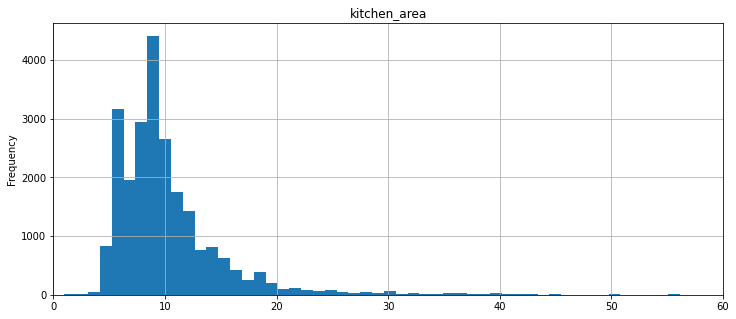

In [60]:
df["kitchen_area"].plot(kind = "hist", bins = 100, title ="kitchen_area", grid = True, figsize = (12,5),xlim = [0,60])

График площади кухни схож с двумя ранее описаными, но имеет более резкий спад в чистоте после 12 квадратный метров. 

# last_price

<AxesSubplot:title={'center':'last_price'}, ylabel='Frequency'>

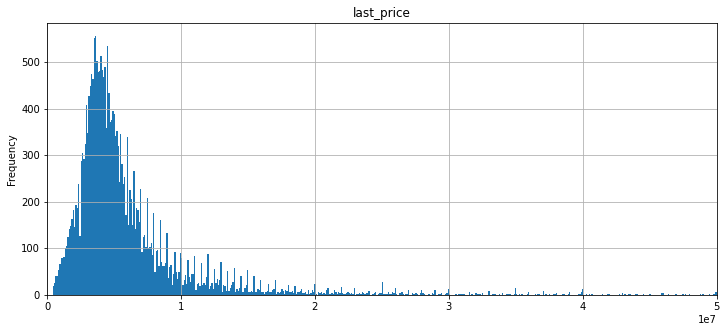

In [61]:
df["last_price"].plot(kind = "hist", bins = 1000, title ="last_price", grid = True, figsize = (12,5), xlim = [0,50000000])

Как можно видеть, график цены имеют форму распределения с длинным хвостом квартир с не нормально высокой стоимостью. Самая частая стоимость квартир составляет в районе 5 миллионов. 

# rooms

<AxesSubplot:title={'center':'rooms'}, ylabel='Frequency'>

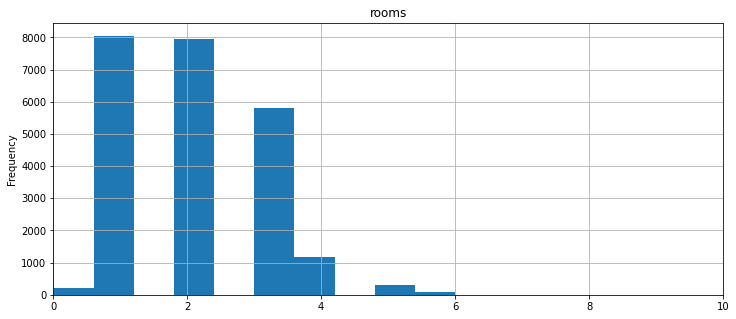

In [62]:
df["rooms"].plot(kind = "hist", bins = 10, title ="rooms", grid = True, figsize = (12,5), xlim = [0,10])

Как можно видеть по результатам, больше всего встречаются квартиры с 2 или 3 квартирами. Так же, довольно часто встречаются квартиры без комнат - студии или квартиры с одной комнатой. 

# ceiling_height

<AxesSubplot:title={'center':'ceiling_height'}, ylabel='Frequency'>

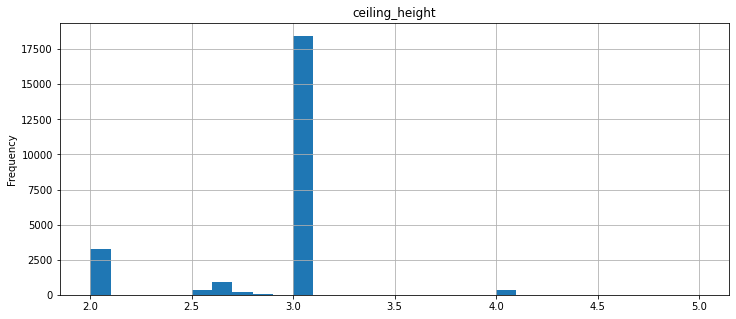

In [63]:
df["ceiling_height"].plot(kind = "hist", bins = 30, title ="ceiling_height", grid = True, figsize = (12,5))

Из данных по высоте потолка, можно наблюдать наличие четырех групп по высоте потолков - 2, 2.5, 3 и 4 метра. 

# floor

<AxesSubplot:title={'center':'floor'}, ylabel='Frequency'>

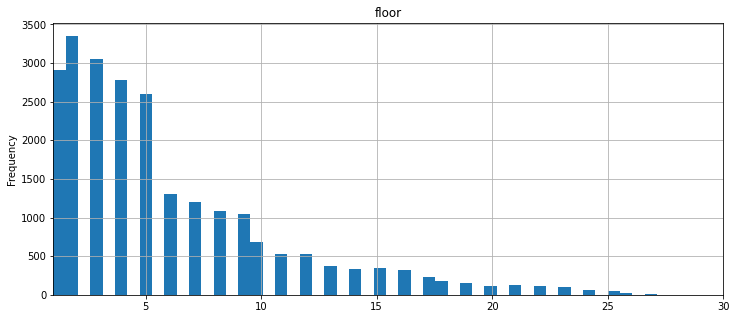

In [64]:
df["floor"].plot(kind = "hist", bins = 60, title ="floor", grid = True, figsize = (12,5), xlim = [1,30])

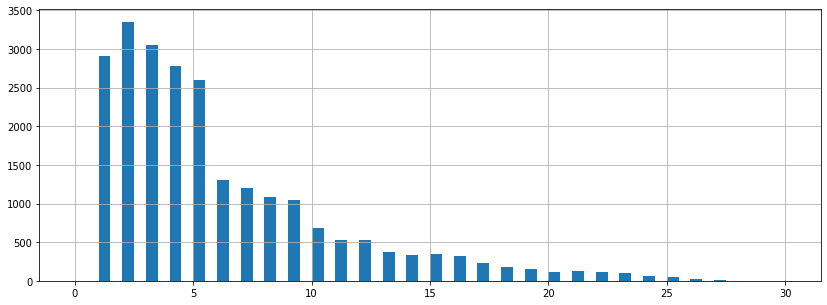

In [65]:
df["floor"].hist(range = (0,30), bins = 60, grid = True, figsize = (14,5));

Из данных видно, что самый популярный этаж - второй. Далее, чем выше этаж, тем меньшая частичность с исключением на первый, который на третьем месте по частичности. 

# floor_type

In [66]:
print(df.groupby("floor_type")["floor_type"].count())

floor_type
другой       17370
первый        2881
последний     3328
Name: floor_type, dtype: int64


Из данных, можно заметить, что довольная большая группа квартир имеет или первый, или последний этаж, а именно 26 процентом от всех квартир, что не мало.

<AxesSubplot:title={'center':'floors_total'}, ylabel='Frequency'>

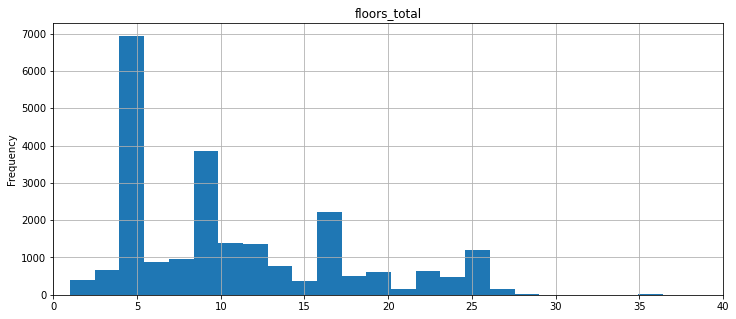

In [67]:
df["floors_total"].plot(kind = "hist", bins = 40, title ="floors_total", grid = True, figsize = (12,5), xlim = [0,40])

Из данных об общем количестве этажей, можно увидеть какие дома самые типичные, например всеми известные 5ти и 9ти этажки или 16ти и 25ти этажки. 

# cityCenters_nearest

<AxesSubplot:title={'center':'cityCenters_nearest'}, ylabel='Frequency'>

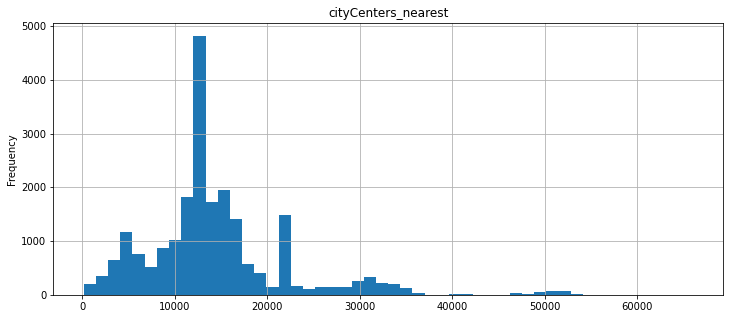

In [68]:
df["cityCenters_nearest"].plot(kind = "hist", bins = 50, title ="cityCenters_nearest", grid = True, figsize = (12,5))

Данный график показывает, что чаще всего квартиры расположены от центра на расстоянии около 12-13 км. Но есть и другие пики 22 км и 5 км, которые скорее всего связаны с логистическими факторами. 

# airports_nearest

<AxesSubplot:title={'center':'airports_nearest'}, ylabel='Frequency'>

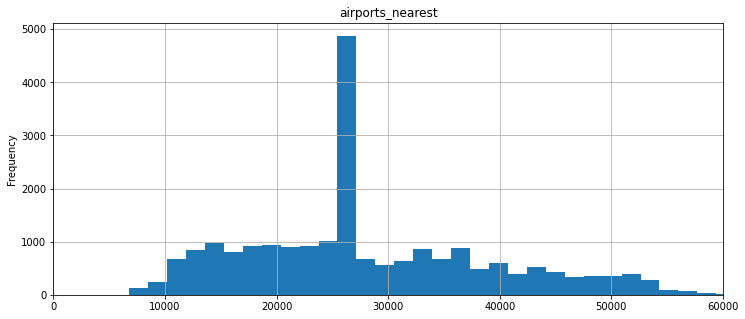

In [69]:
df["airports_nearest"].plot(kind = "hist", bins = 50, title ="airports_nearest", grid = True, figsize = (12,5), xlim = [0,60000])

График показывает не нормально высокое значение частоты квартир распложённые на расстоянии в 26-27 км от аэропорта. 

# parks_nearest

<AxesSubplot:title={'center':'parks_nearest'}, ylabel='Frequency'>

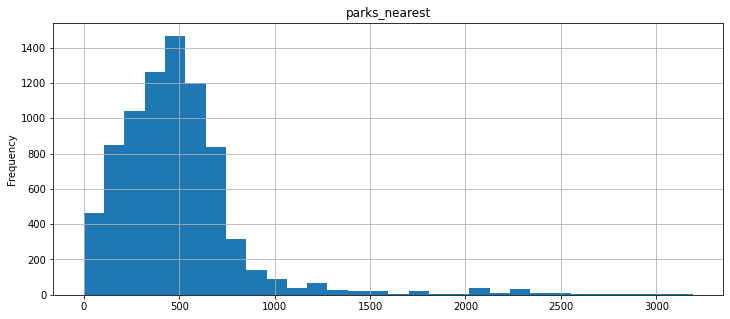

In [70]:
df["parks_nearest"].plot(kind = "hist", bins = 30, title ="parks_nearest", grid = True, figsize = (12,5))

Из данных можно видеть, что большинство квартир имеют парк на расстоянии менее 500 метров. 

# appearance_weekday

<AxesSubplot:title={'center':'appearance_weekday'}, ylabel='Frequency'>

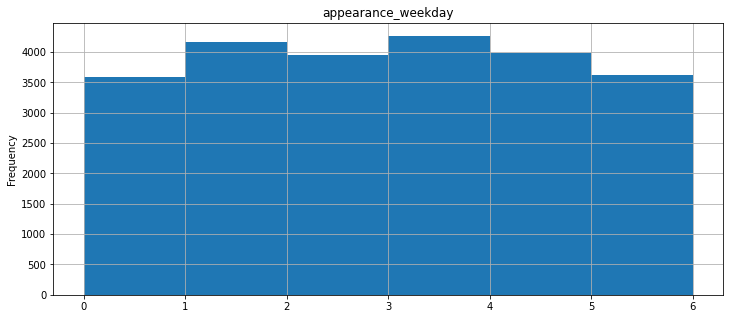

In [71]:
df["appearance_weekday"].plot(kind = "hist", bins = 6, title ="appearance_weekday", grid = True, figsize = (12,5))

Из результат видно, что день неделе категорически не влияет на частоту появления объявлений. 

# appearance_month

<AxesSubplot:title={'center':'appearance_month'}, ylabel='Frequency'>

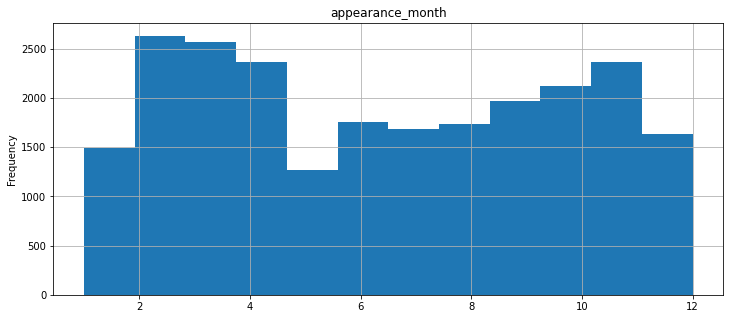

In [72]:
df["appearance_month"].plot(kind = "hist", bins = 12, title ="appearance_month", grid = True, figsize = (12,5))

Из данных по частоте выставления обявлений по месяцам, можно заметить, что есть два пиковыз периода - весна и осень. 

# days_exposition

<AxesSubplot:title={'center':'days_exposition'}, ylabel='Frequency'>

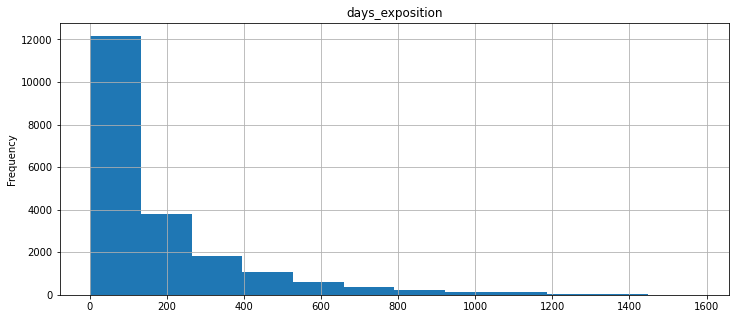

In [73]:
df["days_exposition"].plot(kind = "hist", bins = 12, title ="days_exposition", grid = True, figsize = (12,5))

In [74]:
print(df["days_exposition"].mean())

180.39652471855115


In [75]:
print(df["days_exposition"].median())

95.0


С учетом разницы между средней и медианы в два раза, говорит что распределении пирсона перекошено в лево. Что так же говорит, что медианное значение хорошо репрезентует ожидания по срокам продажи квартиры. Поэтому, стоит брать срок в четверть года (90 дней) как ожидаемый срок продажи. Так, продажи осуществленные до 90 дней - быстрые, а после 90 дней с размещения объявления - долгие.


<AxesSubplot:title={'center':'Total_area VS Last_price'}, xlabel='total_area'>

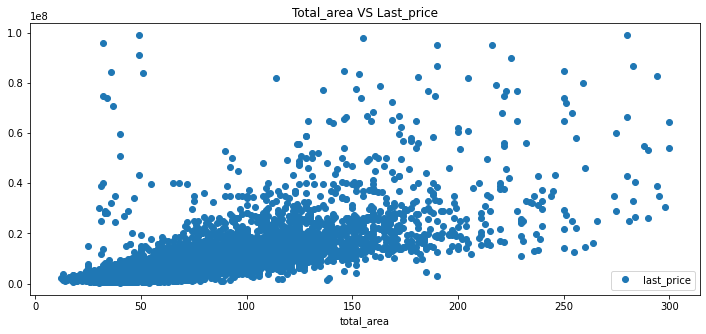

In [76]:
df.plot(x = "total_area", y = "last_price", style = "o", figsize = (12,5), title = "Total_area VS Last_price")

In [77]:
df["total_area"].corr(df["last_price"])

0.7209688896273412

С довольно большой корреляцией и формой графика, можно утвердить, что размер общей области имеет влияние на цену квартиры. 

<AxesSubplot:title={'center':'Living_area VS Last_price'}, xlabel='living_area'>

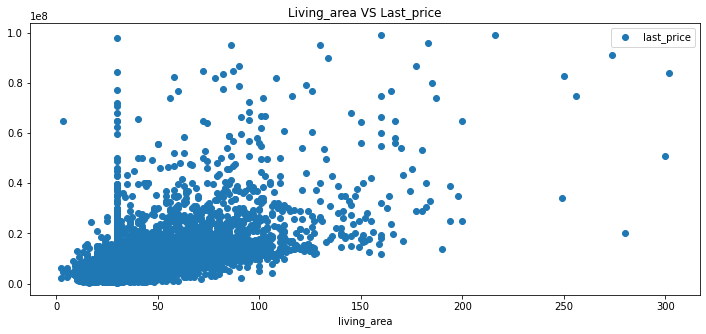

In [78]:
df.plot(x = "living_area", y = "last_price", style = "o", figsize = (12,5), title = "Living_area VS Last_price")

In [79]:
df["living_area"].corr(df["last_price"])

0.623849169298166

Из данных, влияние размера жилой площади на цену квартиры присутствует, но не большое. 

<AxesSubplot:title={'center':'Kitchen_area VS Last_price'}, xlabel='kitchen_area'>

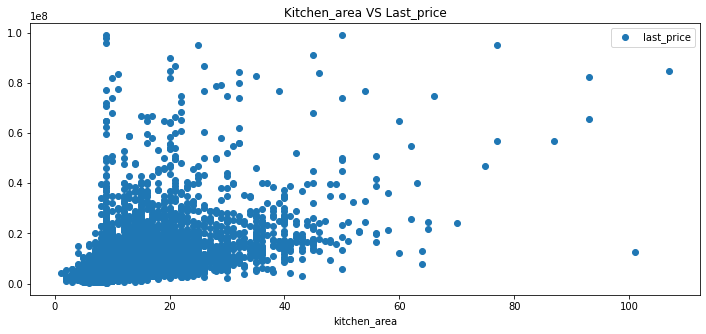

In [80]:
df.plot(x = "kitchen_area", y = "last_price", style = "o", figsize = (12,5), title = "Kitchen_area VS Last_price")

In [81]:
df["kitchen_area"].corr(df["last_price"])

0.5485693173605056

Схоже с жилой площадью, но в меньшей степени присутствует влияние размера кухни на стоимость квартиры

<AxesSubplot:title={'center':'Floor VS Last_price'}, xlabel='floor'>

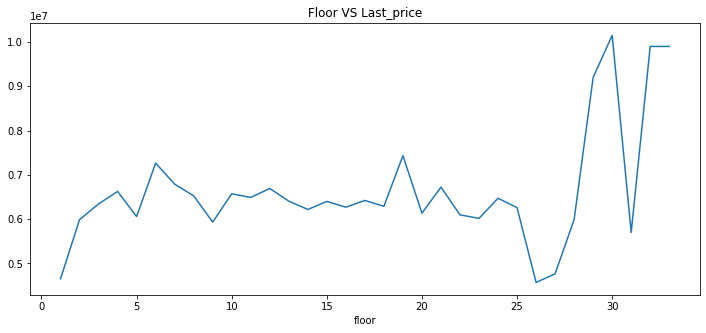

In [82]:
df.groupby("floor")["last_price"].mean().plot(figsize = (12,5), title = "Floor VS Last_price")

In [83]:
df["floor"].corr(df["last_price"])

0.04252701325578714

Линейной заимосвязи между этажом и ценной - не имеется. Однако, можно заметить, что первые 2 этажа имеет более низкую стоимость, а уже с 3 по 25 этаж стоимость не отличается от этажа. Так же, стоит заметить ситуацию, после 25 этажа, но такие данные нужно скорее рассматривать индивидуально, так как есть шанс, что это могут быть или пентхаусы, либо в связи со своей высотность, более премиальные здания. 

<AxesSubplot:title={'center':'Floor_type VS Last_price'}, xlabel='floor_type'>

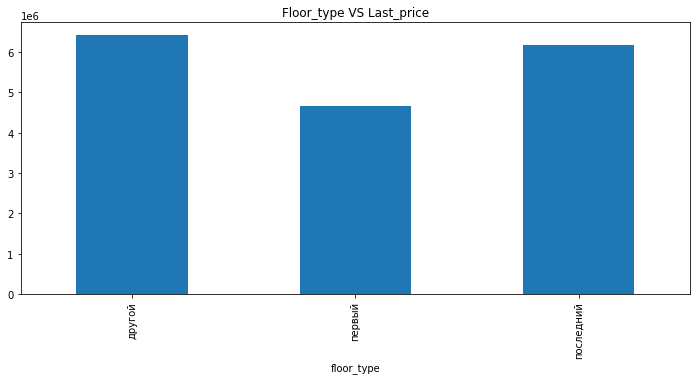

In [84]:
df.groupby("floor_type")["last_price"].mean().plot(kind = "bar", figsize = (12,5), title = "Floor_type VS Last_price")

Данный график подтверждает увиденное ранее, что первый этаж имеет более низкую стоимость чем остальные. 

<AxesSubplot:title={'center':'Appearance_weekday VS Last_price'}, xlabel='appearance_weekday'>

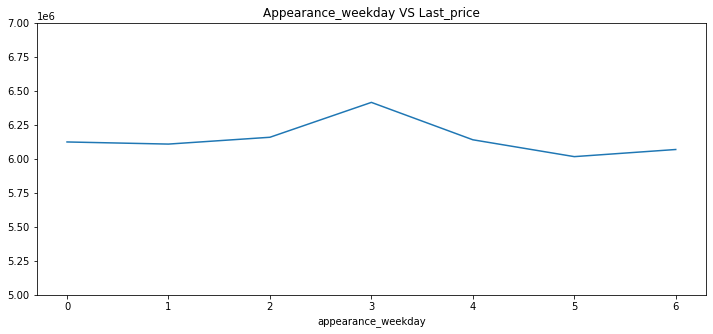

In [85]:
df.groupby("appearance_weekday")["last_price"].mean().plot(figsize = (12,5), title = "Appearance_weekday VS Last_price", ylim = [5000000,7000000])

In [86]:
df["appearance_weekday"].corr(df["last_price"])

-0.0006744945474473382

Взаимосвязи между днем публикации и ценной - не имеется. 

<AxesSubplot:title={'center':'Appearance_month VS Last_price'}, xlabel='appearance_month'>

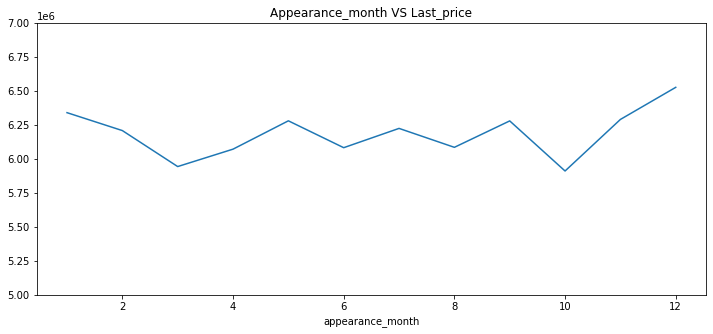

In [87]:
df.groupby("appearance_month")["last_price"].mean().plot( figsize = (12,5), title = "Appearance_month VS Last_price", ylim = [5000000,7000000])

In [88]:
df["appearance_month"].corr(df["last_price"])

0.006973338348519097

Взаимосвязи между месяцем публикации и ценной - не имеется. 

<AxesSubplot:title={'center':'Appearance_year VS Last_price'}, xlabel='appearance_year'>

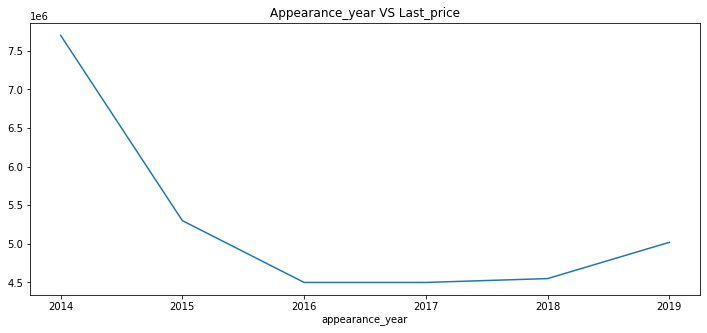

In [89]:
df.groupby("appearance_year")["last_price"].median().plot( figsize = (12,5), title = "Appearance_year VS Last_price")

In [90]:
df["appearance_year"].corr(df["last_price"])

-0.05696986218906763

Из данных, можно заметить, что после 2014 рынок недвижимости обвалился и опускался еще 2 года, после стагнировал 2 года и только к 2019 вернулся к росту. 

# 4 Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.

In [91]:
top_locality = df.pivot_table(index = "locality_name", values = "price_per_meter_sqr", aggfunc = ["count","mean"])
display(top_locality)

,count,mean
,price_per_meter_sqr,price_per_meter_sqr
locality_name,,
unknown,49,94310.020408
бокситогорск,16,17551.625000
волосово,36,40183.305556
волхов,111,35087.702703
всеволожск,398,68654.474874
...,...,...
сосновый бор,87,75220.402299
сясьстрой,24,34405.458333


In [92]:
top_locality= top_locality.reindex(top_locality['count'].sort_values(by = "price_per_meter_sqr", ascending = False).index).head(10)

In [93]:
print(top_locality)

                                count                mean
                  price_per_meter_sqr price_per_meter_sqr
locality_name                                            
санкт-петербург                 15604       115338.000256
посёлок мурино                    522        85752.181992
посёлок шушары                    440        78677.379545
всеволожск                        398        68654.474874
пушкин                            368       105353.467391
колпино                           337        75333.287834
посёлок парголово                 326        90332.236196
гатчина                           307        68746.110749
деревня кудрово                   299        92473.547576
выборг                            237        58141.919831


С явным перевесом, санкт-петербург имеет в три раза больше объявлений чем второе по списку место. Однако, стоимость за квадратные метр не имеет такой большой разрыв между первым и остальными местами как количество объявлений в процентном соотношении. 

# 5 Опишите, как стоимость объектов зависит от расстояния до центра города

In [94]:
spb = df.loc[df["locality_name"] == "санкт-петербург"]

<AxesSubplot:xlabel='distance_to_center'>

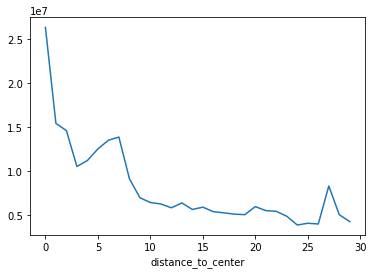

In [95]:
spb.groupby("distance_to_center")["last_price"].mean().plot()

In [96]:
spb["price_per_meter_sqr"].corr(spb["distance_to_center"])

-0.23924393406705263

Что ожидаеммо, данные показывают, что чем ближе к центру тем больше стоймость за метр. Так же, видно, что эксклюзивные квартиры с очень большой ценой за метр присутствуют только близко к центру.

### Общий вывод

Из приведенных данных можно вынести вывод двух типов. Квартиры с какими характеристиками чаще всего встречаются в объявлениях и как эти характеристики влияют на цену квартиры. 

Больше всего объявлений выставлены с квартирами до 50 квадратных метром, с не более чем 3 комнатами. Большой шанс увидеть квартиру на первым или на нижних этажах зданий которые сделаны по типичному плану, на пример 5ти или 9ти этажки. По локации, большинство квартир расположены не более чем в 500 метров от парка и  на расстоянии в 12-13 км от центра. Так же, стоит добавить, что велик шанс увидеть большее количество объявлений в осенний или весенний период. 

Что говоря о факторах которые влияют на стоимость квартиры, факторы которые влияют: 

    -чем больше площадь тем больше стоимость
    -чем ближе к центра тем больше стоимость
    -если квартира на первом этаже, то стоимоть ниже
    
Остальные факторы не имеют сильного влияния на стоимость квартиры или такие факторы размер кухни и размер жилой площади скорее пост фактор общей площади. 